# First attempt at recognising faces using a CNN (TensorFlow and Keras)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras import *

from PIL import Image 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models

Import the datasets and inspect 

In [ ]:
pos_dat = np.load('/content/drive/MyDrive/pos_dat.npy')
neg_dat = np.load('/content/drive/MyDrive/neg_dat.npy')

In [ ]:
#1D array = each row is an image and each column is pixels
print('POSITIVE: Length: {}, Size: {}, Shape: {}, DType: {}'.format(len(pos_dat), pos_dat.size, pos_dat.shape, pos_dat.dtype))

POSITIVE: Length: 13233, Size: 38560962, Shape: (13233, 2914), DType: float32


In [ ]:
print('NEGATIVE: Length: {}, Size: {}, Shape: {}, DType: {}'.format(len(neg_dat), neg_dat.size, neg_dat.shape, neg_dat.dtype))

NEGATIVE: Length: 30000, Size: 87420000, Shape: (30000, 2914), DType: float64


Concat data and split to X and y

In [ ]:
X = np.concatenate((pos_dat, neg_dat), axis=0)
y = np.concatenate((np.ones(len(pos_dat)), np.zeros(len(neg_dat))), axis=0)

Reshape the data to a 2D array




In [ ]:
X = X.reshape((X.shape[0], 62, 47))

# Inspect the data

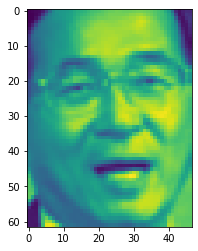

In [ ]:
plt.imshow(X[21])
plt.show()

Split the data into training and testing data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Normalise each pixel data between 0-1. 

In [ ]:
X_train = X_train.astype('float32') / 255.0 
X_test = X_test.astype('float32') / 255.0 

Add an extra dimension 

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(62, 47, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 45, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 20, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 8, 128)        73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 4, 128)       

Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1081/1081 [==============================] - 10s 7ms/step - loss: 0.6254 - accuracy: 0.6905 - val_loss: 0.6214 - val_accuracy: 0.6879
Epoch 2/20
1081/1081 [==============================] - 7s 6ms/step - loss: 0.6179 - accuracy: 0.6954 - val_loss: 0.6208 - val_accuracy: 0.6879
Epoch 3/20
1081/1081 [==============================] - 8s 8ms/step - loss: 0.6173 - accuracy: 0.6954 - val_loss: 0.6216 - val_accuracy: 0.6879
Epoch 4/20
1081/1081 [==============================] - 7s 7ms/step - loss: 0.6164 - accuracy: 0.6954 - val_loss: 0.6212 - val_accuracy: 0.6879
Epoch 5/20
1081/1081 [==============================] - 8s 8ms/step - loss: 0.6103 - accuracy: 0.6954 - val_loss: 0.4997 - val_accuracy: 0.6879
Epoch 6/20
1081/1081 [==============================] - 7s 7ms/step - loss: 0.4712 - accuracy: 0.6919 - val_loss: 0.4647 - val_accuracy: 0.6879
Epoch 7/20
1081/1081 [==============================] - 8s 8ms/step - loss: 0.4637 - accuracy: 0.6945 - val_loss: 0.4614 - val_accuracy

Plot a line graph to see accuracy over each epoch

271/271 - 1s - loss: 0.0240 - accuracy: 0.9931 - 1s/epoch - 5ms/step


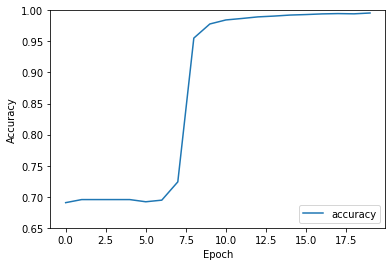

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.65, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print('LOSS: {}, ACCURACY: {}'.format(test_loss, test_acc))

LOSS: 0.02396664395928383, ACCURACY: 0.9930611848831177


Test the model on new images

In [ ]:
img = Image.open('/content/face.jpeg').convert("L")
# Resize the image to the desired shape
img = img.resize((47, 62))

# Convert the image to a numpy array and normalize the pixel values
img_array = np.array(img) / 255.0

# Add a new dimension to the array to make it compatible with the model
img_array = np.expand_dims(img_array, axis=-1)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the model
prediction = model.predict(img_array)[0][0]


1/1 [==============================] - 0s 40ms/step


In [ ]:
if prediction > 0.65:
  print('This image likely contains a face. ({}% confidence)'.format(round(prediction*100, 2)))
else:
  print('This image likely does not contain a face.')

This image likely contains a face. (99.74% confidence)


[]

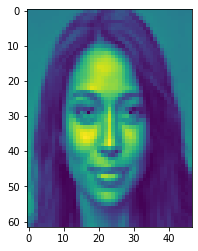

In [ ]:
plt.imshow(img)
plt.plot()

If it works, save the model with pickle

In [ ]:
model.save('FaceDetection.h5')